# Laboratorio 3 – Deep Learning
### Universidad del Valle de Guatemala
Este notebook cubre los ejercicios 1 al 4 del laboratorio, utilizando el dataset PolyMNIST (modalidades m0 a m4).

---

## Introducción
El objetivo de este laboratorio es desarrollar modelos de deep learning capaces de reconocer caracteres manuscritos utilizando el dataset **PolyMNIST**, el cual cuenta con 5 modalidades distintas (`m0` a `m4`). Cada modalidad presenta imágenes con diferentes fondos, pero los mismos dígitos.

En este notebook se abordarán los siguientes puntos:
1. Mostrar ejemplos de cada modalidad.
2. Análisis exploratorio del dataset.
3. Implementación de dos modelos CNN.
4. Implementación de una red neuronal simple sin convoluciones.

## Ejercicio 1 – Ejemplos de cada modalidad

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/data/PolyMNIST.zip" -d "/content/"


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/PolyMNIST/MMNIST/train/m4/1873.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._1873.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/3346.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._3346.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/4656.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._4656.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/1030.9.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._1030.9.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/2310.3.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._2310.3.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/1962.4.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._1962.4.png  
  inflating: /content/PolyMNIST/MMNIST/train/m4/3257.4.png  
  inflating: /content/__MACOSX/PolyMNIST/MMNIST/train/m4/._3257.4.png  
  inflat

Muestra de imagenes por cada modalidad
- en este aparado Vvsualicemos algunas de las imágenes que tiene cada modalidad. Se mostrarán las primeras 5 imágenes por cada modalidad con el fin de observa de mejor manera como se encutrar y asi poder determinar que cambiamos podremos hacer.

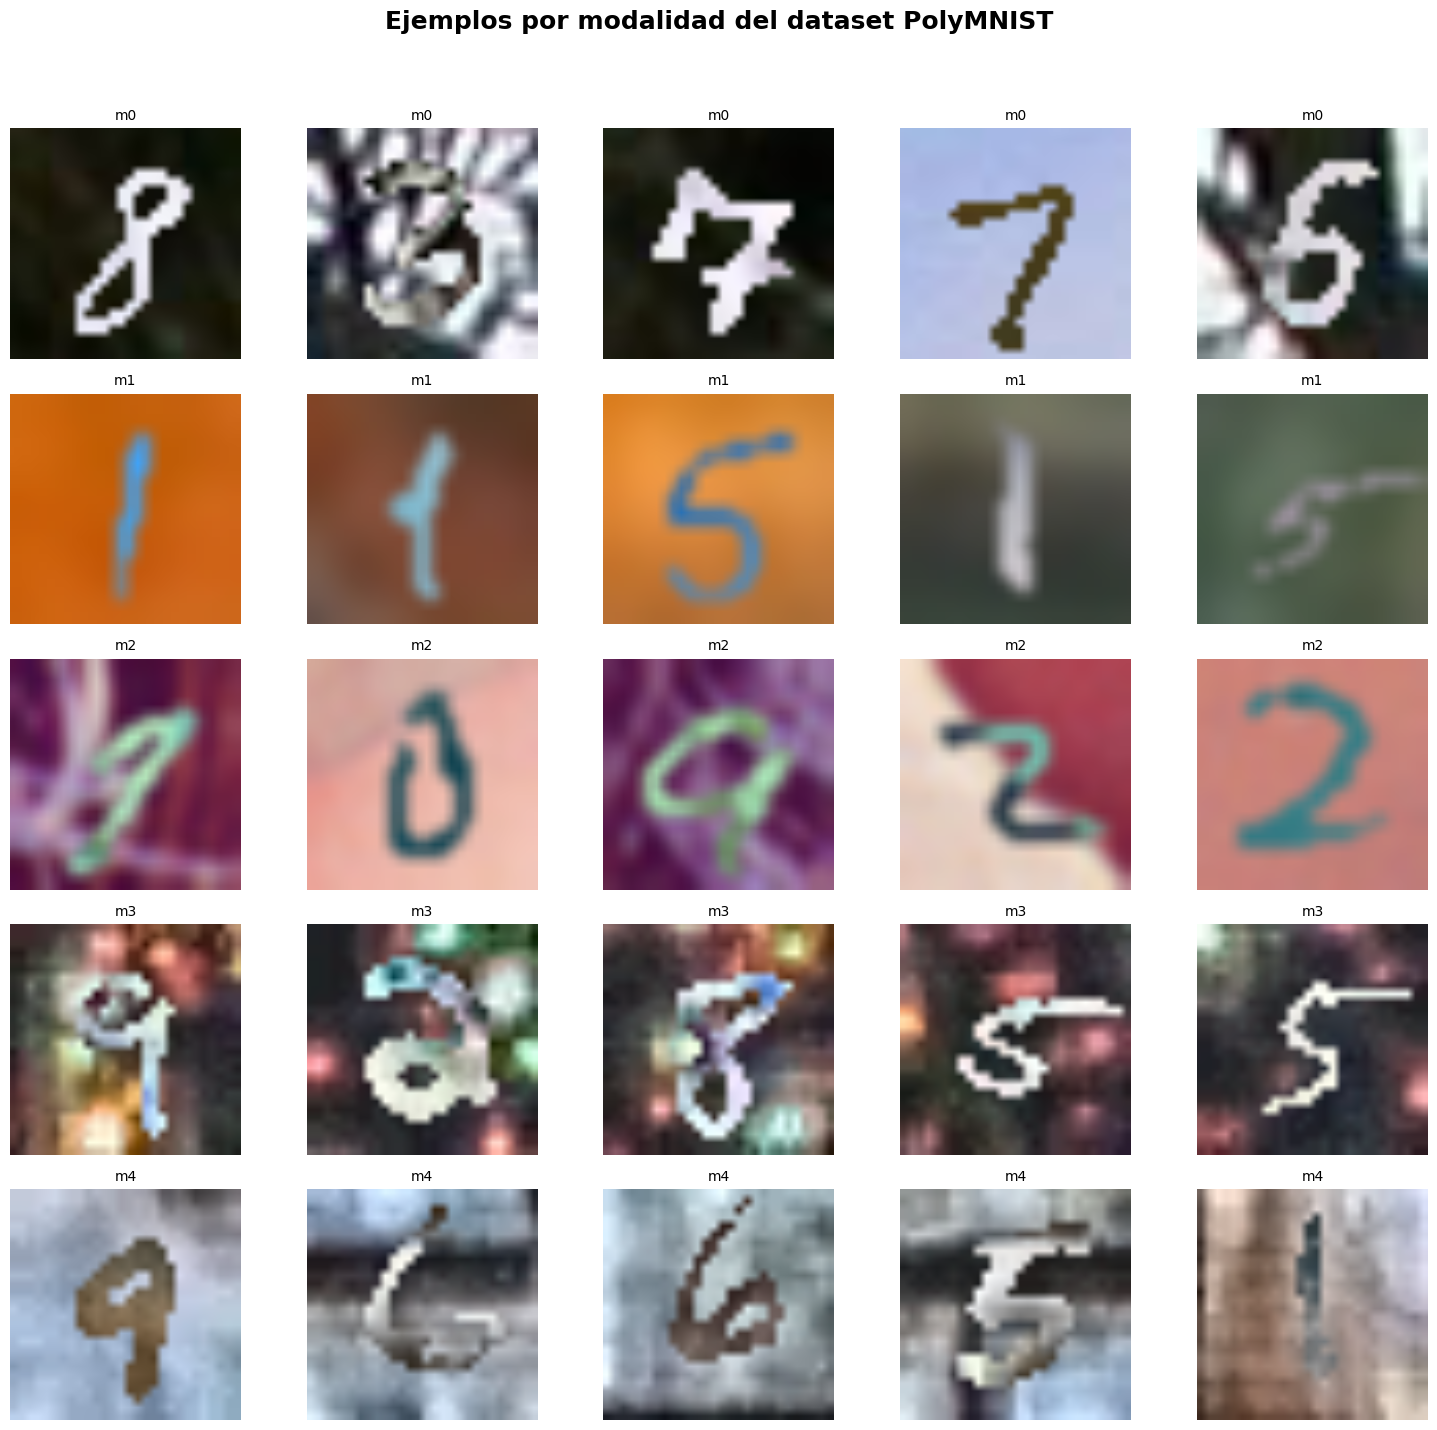

In [26]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

modalidades = ["m0", "m1", "m2", "m3", "m4"]
base_path = "/content/PolyMNIST/MMNIST/train"

def mejorar_imagen(img, modalidad):
    # Filtros por modalidad (solo visualización)
    if modalidad in ["m3", "m4"]:
        # Reducir ruido + mejorar contraste
        img = cv2.bilateralFilter(img, 9, 75, 75)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        lab = cv2.merge((cl,a,b))
        img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    elif modalidad in ["m1", "m2"]:
        img = cv2.GaussianBlur(img, (3,3), 0)
    return img

plt.figure(figsize=(15, 15))
plt.suptitle("Ejemplos por modalidad del dataset PolyMNIST", fontsize=18, fontweight="bold")

index = 1
for modalidad in modalidades:
    path = os.path.join(base_path, modalidad)
    imagenes = [f for f in os.listdir(path) if f.endswith(".png")]
    muestras = random.sample(imagenes, 5)

    for nombre_img in muestras:
        img_path = os.path.join(path, nombre_img)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Aplicar mejora visual (sin modificar datos originales)
        img = mejorar_imagen(img, modalidad)

        plt.subplot(5, 5, index)
        plt.imshow(img, interpolation='bilinear')  # O 'bicubic'
        plt.axis("off")
        plt.title(modalidad, fontsize=10)
        index += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observaciones sobre las modalidades del dataset PolyMNIST

- Cada modalidad (`m0` a `m4`) presenta variaciones visuales distintas en el fondo.
- El dígito manuscrito es el elemento constante entre modalidades, pero cambia su color, grosor y contraste.
- Las modalidades m3 y m4 son visualmente más ruidosas.

Variación en los fondos por modalidad
Cada modalidad (m0, m1, m2, m3, m4) tiene un estilo de fondo característico:

- m0: fondos sólidos o texturas simples (como azul claro).

- m1: colores más vivos o planos (naranja, marrón).

- m2: fondos con texturas más orgánicas o difusas (rosado, rojo).

- m3: fondos oscuros o con efectos de luces, como luces navideñas (muy ruidoso).

- m4: desenfoque, alto contraste o mezcla de tonos grises (más abstracto).
